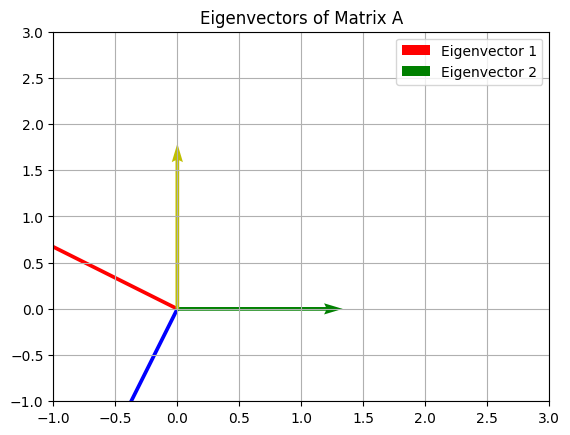

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define a 2x2 matrix
A = np.array([[3, 2], [2, 6]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

# Plot the vectors
origin = np.zeros((2, eigenvectors.shape[1]))  # Origin points for each vector
plt.quiver(*origin, eigenvectors[0, :], eigenvectors[1, :], color=['r', 'b'], scale=3, label='Eigenvectors')
plt.quiver(*origin, [1, 0], [0, 1], color=['g', 'y'], scale=3, label='Unit Vectors')

# Add labels and show
plt.legend(['Eigenvector 1', 'Eigenvector 2', 'Unit Vector 1', 'Unit Vector 2'])
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.grid()
plt.title("Eigenvectors of Matrix A")
plt.show()

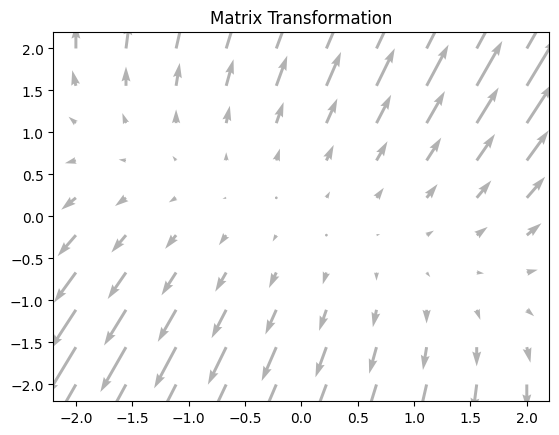

In [2]:
# Generate a grid of vectors
x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)
X, Y = np.meshgrid(x, y)
grid = np.array([X.flatten(), Y.flatten()])

# Transform grid
transformed_grid = A @ grid

# Plot original and transformed grid
plt.quiver(grid[0, :], grid[1, :], transformed_grid[0, :]-grid[0, :], transformed_grid[1, :]-grid[1, :], color='gray', alpha=0.6)
plt.title("Matrix Transformation")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

def visualize_matrix(a, b, c, d):
    # Define the matrix
    A = np.array([[a, b], [c, d]])
    
    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    # Create a grid of vectors
    x = np.linspace(-2, 2, 10)
    y = np.linspace(-2, 2, 10)
    X, Y = np.meshgrid(x, y)
    grid = np.array([X.flatten(), Y.flatten()])
    transformed_grid = A @ grid  # Apply matrix transformation
    
    # Plot original and transformed grids
    plt.figure(figsize=(8, 8))
    plt.quiver(grid[0, :], grid[1, :], transformed_grid[0, :] - grid[0, :], transformed_grid[1, :] - grid[1, :], color="gray", alpha=0.5)
    plt.quiver(0, 0, eigenvectors[0, 0], eigenvectors[1, 0], color="r", scale=1, label="Eigenvector 1")
    plt.quiver(0, 0, eigenvectors[0, 1], eigenvectors[1, 1], color="b", scale=1, label="Eigenvector 2")
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid()
    plt.legend()
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.title(f"Matrix: [{a}, {b}; {c}, {d}]")
    plt.show()

# Create sliders for matrix elements
interact(visualize_matrix, a=(-3, 3), b=(-3, 3), c=(-3, 3), d=(-3, 3));


interactive(children=(IntSlider(value=0, description='a', max=3, min=-3), IntSlider(value=0, description='b', …

In [7]:
def power_method(A, num_iterations=20):
    # Start with a random vector
    b = np.random.rand(A.shape[0])
    b /= np.linalg.norm(b)  # Normalize the vector
    
    eigenvalues = []
    for _ in range(num_iterations):
        # Apply the matrix to the vector
        b = A @ b
        b /= np.linalg.norm(b)  # Normalize again
        
        # Compute the Rayleigh quotient (approximate eigenvalue)
        eigenvalue = b.T @ A @ b
        eigenvalues.append(eigenvalue)
    
    return b, eigenvalues

def visualize_power_method(a, b, c, d, iterations=10):
    A = np.array([[a, b], [c, d]])
    dominant_eigenvector, eigenvalues = power_method(A, iterations)
    
    # Plot eigenvalue convergence
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, iterations + 1), eigenvalues, marker='o', color='b', label='Estimated Eigenvalue')
    plt.axhline(np.max(np.linalg.eigvals(A)), color='r', linestyle='--', label='True Max Eigenvalue')
    plt.xlabel('Iteration')
    plt.ylabel('Eigenvalue')
    plt.title('Power Method: Eigenvalue Convergence')
    plt.legend()
    plt.grid()
    plt.show()
    
    print("Dominant Eigenvector (approx.):", dominant_eigenvector)

# Add sliders for matrix input
interact(visualize_power_method, a=(-3, 3), b=(-3, 3), c=(-3, 3), d=(-3, 3), iterations=(5, 20));


interactive(children=(IntSlider(value=0, description='a', max=3, min=-3), IntSlider(value=0, description='b', …

In [5]:
import plotly.express as px
import pandas as pd
import numpy as np

# Generate sample data
np.random.seed(42)
df = pd.DataFrame({
    'x': np.random.rand(100) * 10,
    'y': np.random.rand(100) * 10,
    'z': np.random.rand(100) * 10,
    'color': np.random.choice(['A', 'B', 'C'], size=100)  # Random categories
})

# Create a 3D scatter plot
fig = px.scatter_3d(
    df, x='x', y='y', z='z',
    color='color',
    title='Sample 3D Scatter Plot',
    labels={'x': 'X Axis', 'y': 'Y Axis', 'z': 'Z Axis'}
)

# Show the plot in the browser
fig.show()


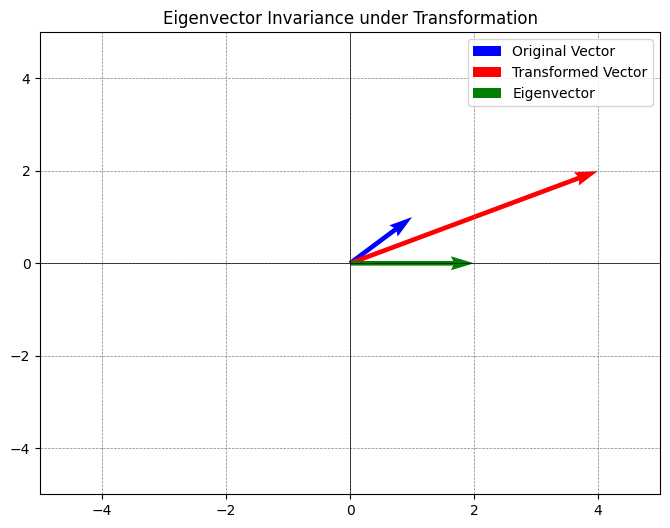

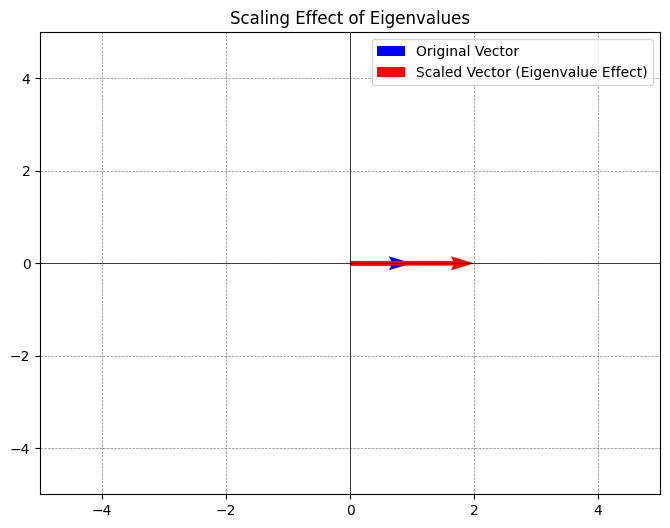

Symmetric Matrix Eigenvalues: [3. 1.]
Symmetric Matrix Eigenvectors:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Diagonal Matrix Eigenvalues: [3. 4.]
Diagonal Matrix Eigenvectors:
 [[1. 0.]
 [0. 1.]]


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Function to visualize eigenvector invariance under transformation
def visualize_eigenvector_invariance():
    A = np.array([[3, 1], [0, 2]])  # Transformation matrix
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    vector = np.array([1, 1])  # Original vector
    transformed_vector = A @ vector  # Transformed vector

    # Eigenvector
    eigenvector = eigenvectors[:, 0] * 2  # Scale eigenvector for visualization

    plt.figure(figsize=(8, 6))
    plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='blue', label="Original Vector")
    plt.quiver(0, 0, transformed_vector[0], transformed_vector[1], angles='xy', scale_units='xy', scale=1, color='red', label="Transformed Vector")
    plt.quiver(0, 0, eigenvector[0], eigenvector[1], angles='xy', scale_units='xy', scale=1, color='green', label="Eigenvector")

    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.legend()
    plt.title("Eigenvector Invariance under Transformation")
    plt.show()

# Function to visualize scaling effect of eigenvalues
def visualize_scaling_effect():
    A = np.array([[2, 0], [0, 3]])  # Diagonal transformation matrix
    eigenvalues, eigenvectors = np.linalg.eig(A)

    vector = np.array([1, 0])  # Original vector
    scaled_vector = A @ vector  # Transformed vector

    plt.figure(figsize=(8, 6))
    plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='blue', label="Original Vector")
    plt.quiver(0, 0, scaled_vector[0], scaled_vector[1], angles='xy', scale_units='xy', scale=1, color='red', label="Scaled Vector (Eigenvalue Effect)")

    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.legend()
    plt.title("Scaling Effect of Eigenvalues")
    plt.show()

# Function to visualize eigenvalues of special matrices
def visualize_special_matrices():
    symmetric_matrix = np.array([[2, 1], [1, 2]])  # Symmetric matrix
    diagonal_matrix = np.array([[3, 0], [0, 4]])  # Diagonal matrix

    symmetric_eigenvalues, symmetric_eigenvectors = np.linalg.eig(symmetric_matrix)
    diagonal_eigenvalues, diagonal_eigenvectors = np.linalg.eig(diagonal_matrix)

    print("Symmetric Matrix Eigenvalues:", symmetric_eigenvalues)
    print("Symmetric Matrix Eigenvectors:\n", symmetric_eigenvectors)
    print("Diagonal Matrix Eigenvalues:", diagonal_eigenvalues)
    print("Diagonal Matrix Eigenvectors:\n", diagonal_eigenvectors)

# Running visualizations
visualize_eigenvector_invariance()
visualize_scaling_effect()
visualize_special_matrices()


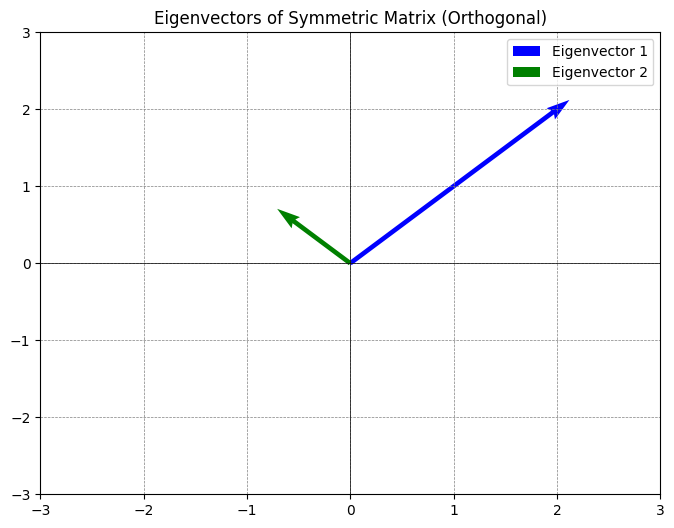

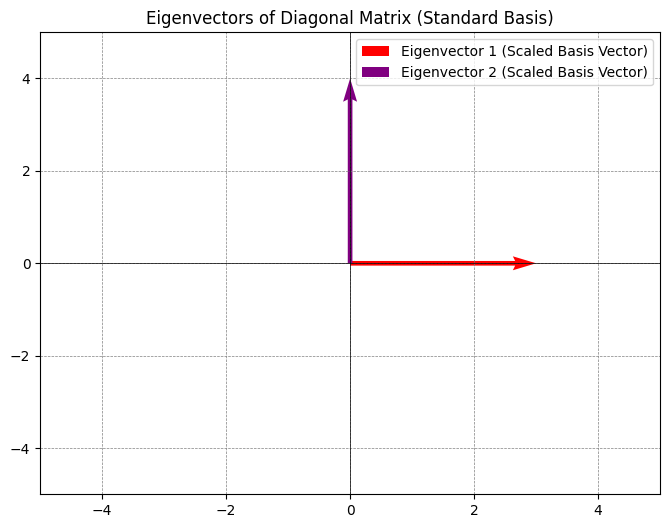

In [9]:
def visualize_symmetric_matrix():
    symmetric_matrix = np.array([[2, 1], [1, 2]])  # Symmetric matrix
    eigenvalues, eigenvectors = np.linalg.eig(symmetric_matrix)

    # Eigenvectors scaled by their eigenvalues
    eigenvector_1 = eigenvectors[:, 0] * eigenvalues[0]
    eigenvector_2 = eigenvectors[:, 1] * eigenvalues[1]

    plt.figure(figsize=(8, 6))
    plt.quiver(0, 0, eigenvector_1[0], eigenvector_1[1], angles='xy', scale_units='xy', scale=1, color='blue', label="Eigenvector 1")
    plt.quiver(0, 0, eigenvector_2[0], eigenvector_2[1], angles='xy', scale_units='xy', scale=1, color='green', label="Eigenvector 2")

    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.title("Eigenvectors of Symmetric Matrix (Orthogonal)")
    plt.show()


def visualize_diagonal_matrix():
    diagonal_matrix = np.array([[3, 0], [0, 4]])  # Diagonal matrix
    eigenvalues, eigenvectors = np.linalg.eig(diagonal_matrix)

    # Standard basis vectors scaled by eigenvalues
    basis_vector_1 = eigenvectors[:, 0] * eigenvalues[0]
    basis_vector_2 = eigenvectors[:, 1] * eigenvalues[1]

    plt.figure(figsize=(8, 6))
    plt.quiver(0, 0, basis_vector_1[0], basis_vector_1[1], angles='xy', scale_units='xy', scale=1, color='red', label="Eigenvector 1 (Scaled Basis Vector)")
    plt.quiver(0, 0, basis_vector_2[0], basis_vector_2[1], angles='xy', scale_units='xy', scale=1, color='purple', label="Eigenvector 2 (Scaled Basis Vector)")

    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.title("Eigenvectors of Diagonal Matrix (Standard Basis)")
    plt.show()


# Visualizing the special matrices
visualize_symmetric_matrix()
visualize_diagonal_matrix()


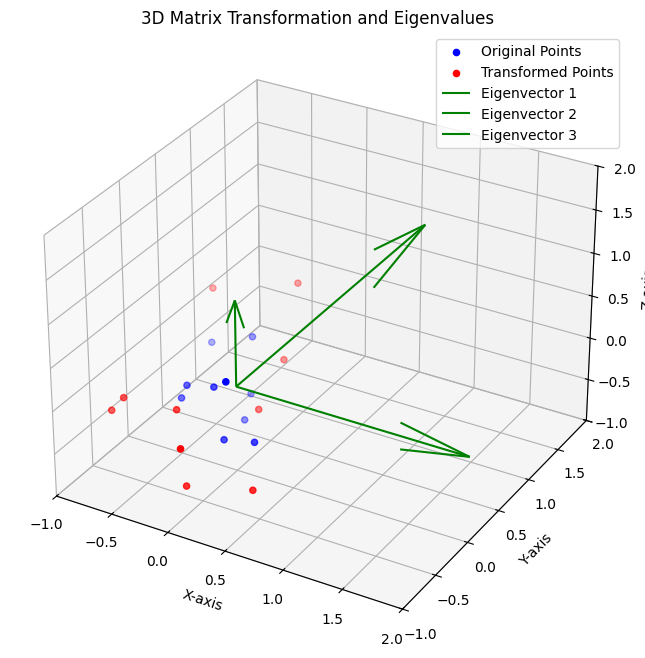

In [10]:
from mpl_toolkits.mplot3d import Axes3D

def visualize_3d_transformation_and_eigenvalues():
    # Define a 3x3 matrix
    A = np.array([[2, 0, 0], [0, 3, 0], [0, 0, 1]])  # Transformation matrix

    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(A)

    # Generate random points in 3D space
    np.random.seed(42)
    points = np.random.rand(10, 3) - 0.5  # Centered around the origin

    # Transform the points using the matrix
    transformed_points = points @ A.T

    # Create a 3D plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot original points
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='blue', label='Original Points')

    # Plot transformed points
    ax.scatter(transformed_points[:, 0], transformed_points[:, 1], transformed_points[:, 2], color='red', label='Transformed Points')

    # Plot eigenvectors
    for i in range(3):
        eigenvector = eigenvectors[:, i] * eigenvalues[i]
        ax.quiver(0, 0, 0, eigenvector[0], eigenvector[1], eigenvector[2], 
                  color='green', label=f"Eigenvector {i+1}")

    # Set plot limits and labels
    ax.set_xlim([-1, 2])
    ax.set_ylim([-1, 2])
    ax.set_zlim([-1, 2])
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.set_title('3D Matrix Transformation and Eigenvalues')
    ax.legend()
    plt.show()


# Run the 3D visualization
visualize_3d_transformation_and_eigenvalues()
